# Major Task :- Twitter Sentiment Analysis

## Importing neccessary files

In [56]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
from sklearn.preprocessing import LabelEncoder
import nltk # for text manipulation
from sklearn.metrics import f1_score
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split

%matplotlib inline

## Load Dataset

In [4]:
train = pd.read_csv('twitter_training.csv')
test = pd.read_csv('twitter_validation.csv')

## Data Inspection

In [5]:
train.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"
5,2402,Borderlands,Positive,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . ...
6,2402,Borderlands,Positive,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Her..."
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.
8,2402,Borderlands,Positive,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Her...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. ...


In [6]:
train.tail(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74671,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights automatically records your best moments in @ FenniteGame on GFN!.
74672,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights automatically records your best shot in video on GFN!.. Share them with
74673,9199,Nvidia,Positive,Let a no information elim that go unnoticed.... NVIDIA Highlights automatically in records your three best moments in The @FortniteGame on my GFN!.. Share them with
74674,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pictures reveals your best moments in @FortniteGame on GFN!.. Share them with
74675,9200,Nvidia,Positive,Just realized the windows partition of my Mac is like 6 years behind on Nvidia drivers and I have no idea how I didn’t notice
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my Mac is like 6 years behind Nvidia drivers and I have no idea how I did not notice
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is 6 years behind on Nvidia drivers and I have no idea how I didn't notice
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice
74679,9200,Nvidia,Positive,Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice


In [7]:
train.shape, test.shape

((74681, 4), (999, 4))

In [8]:
train.value_counts()

2401   Borderlands                        Positive    im getting on borderlands and i will murder you all ,                                                                          
5810   HomeDepot                          Positive    Congratulations!!                                                                                                                  5
2895   Dota2                              Positive    Wow                                                                                                                                5
10181  PlayerUnknownsBattlegrounds(PUBG)  Irrelevant  Really                                                                                                                             5
3108   Dota2                              Negative    wtf                                                                                                                                5
1932   CallOfDutyBlackopsColdWar          Positive    Wow             

In [9]:
train.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [10]:
train.duplicated().sum()

2700

## Data Preprocessing and Cleaning

In [11]:
train_a = train.dropna()

In [12]:
train_data = train_a.drop_duplicates()

In [13]:
train_data.isnull().sum()

2401                                                     0
Borderlands                                              0
Positive                                                 0
im getting on borderlands and i will murder you all ,    0
dtype: int64

In [14]:
train_data.duplicated().sum()

0

In [15]:
train_data.iloc[:, 2].value_counts()

Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: Positive, dtype: int64

In [16]:
test.iloc[:, 2].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: Irrelevant, dtype: int64

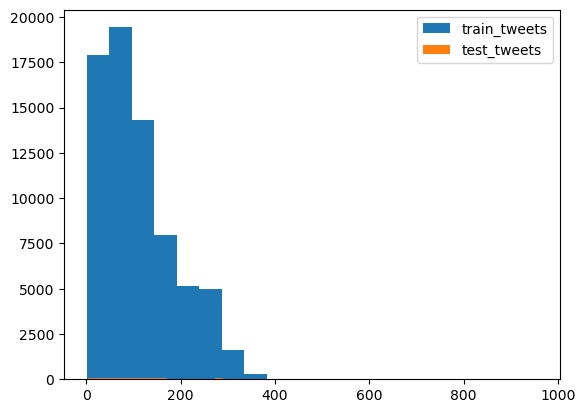

In [17]:
length_train = train_data.iloc[:, 3].str.len()
length_test = test.iloc[:, 3].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [18]:
combi = train_data.append(test, ignore_index=True)
combi.describe()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2892\105516532.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train_data.append(test, ignore_index=True)


,2401,3364
count,71655.000000,999.000000
mean,6436.493559,6435.159159
std,3742.287116,3728.912226
min,1.000000,6.000000
25%,3199.000000,3241.500000
50%,6433.000000,6560.000000
75%,9604.000000,9662.500000
max,13200.000000,13197.000000


In [19]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [20]:
combi.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,"I am coming to the borders and I will kill you all,",NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,"im getting on borderlands and i will kill you all,",NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,"im coming on borderlands and i will murder you all,",NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,",NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,"im getting into borderlands and i can murder you all,",NaN,NaN,NaN,NaN
5,2402.0,Borderlands,Positive,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . ...,NaN,NaN,NaN,NaN
6,2402.0,Borderlands,Positive,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Her...",NaN,NaN,NaN,NaN
7,2402.0,Borderlands,Positive,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.,NaN,NaN,NaN,NaN
8,2402.0,Borderlands,Positive,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Her...,NaN,NaN,NaN,NaN
9,2402.0,Borderlands,Positive,2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. ...,NaN,NaN,NaN,NaN


In [21]:
combi.tail(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
72644,NaN,NaN,NaN,NaN,11504.0,TomClancysRainbowSix,Positive,"Tom Clancy's Rainbow Six Siege is a great game to play with no negatives, welp i guess im back on the grind pic.twitter.com/0Wn3AreahG"
72645,NaN,NaN,NaN,NaN,2165.0,CallOfDuty,Neutral,Late night stream with the boys! Come watch some warzone runs as we struggle to get a dub! #warzone #callofduty #battleroyale #facebookgaming \n\nFacebook.com/YetiCasual instagram.com/p/CEYfcX0heDs/…
72646,NaN,NaN,NaN,NaN,2962.0,Dota2,Positive,guess i'll broke.
72647,NaN,NaN,NaN,NaN,314.0,Amazon,Negative,Please explain how this is possible! How can they let companies overcharge for this? It’s a scam! @amazon shame on you! pic.twitter.com/MQB7BUPthx
72648,NaN,NaN,NaN,NaN,9701.0,PlayStation5(PS5),Positive,"Good on Sony. As much as I want to see the new PS5, what's going on right now is so much more important."
72649,NaN,NaN,NaN,NaN,4891.0,GrandTheftAuto(GTA),Irrelevant,"⭐️ Toronto is the arts and culture capital of Canada, it’s no wonder! If you want to start planning, be sure to check out our GTA Real Estate market report for Fall 2020, it has all the info you n..."
72650,NaN,NaN,NaN,NaN,4359.0,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VIEWERS.\n\nI was one of those people who got hooked into csgo by watching tournaments first before playing the game. And seeing these players grew is l...
72651,NaN,NaN,NaN,NaN,2652.0,Borderlands,Positive,Today sucked so it’s time to drink wine n play borderlands until the sun comes up so I can hate myself all day tomorrow.
72652,NaN,NaN,NaN,NaN,8069.0,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
72653,NaN,NaN,NaN,NaN,6960.0,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby powder in U.S. and Canada j.mp/3e1YtDV (Reuters) https://t.co/dsaUTgb5p9


##### Removing Twitter Handles (@user)

In [22]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi.iloc[:, 7].astype(str), "@[\w]*")
combi.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",tidy_tweet
0,2401.0,Borderlands,Positive,"I am coming to the borders and I will kill you all,",NaN,NaN,NaN,NaN,nan
1,2401.0,Borderlands,Positive,"im getting on borderlands and i will kill you all,",NaN,NaN,NaN,NaN,nan
2,2401.0,Borderlands,Positive,"im coming on borderlands and i will murder you all,",NaN,NaN,NaN,NaN,nan
3,2401.0,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,",NaN,NaN,NaN,NaN,nan
4,2401.0,Borderlands,Positive,"im getting into borderlands and i can murder you all,",NaN,NaN,NaN,NaN,nan


In [23]:
combi.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",tidy_tweet
72649,NaN,NaN,NaN,NaN,4891.0,GrandTheftAuto(GTA),Irrelevant,"⭐️ Toronto is the arts and culture capital of Canada, it’s no wonder! If you want to start planning, be sure to check out our GTA Real Estate market report for Fall 2020, it has all the info you n...","⭐️ Toronto is the arts and culture capital of Canada, it’s no wonder! If you want to start planning, be sure to check out our GTA Real Estate market report for Fall 2020, it has all the info you n..."
72650,NaN,NaN,NaN,NaN,4359.0,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VIEWERS.\n\nI was one of those people who got hooked into csgo by watching tournaments first before playing the game. And seeing these players grew is l...,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VIEWERS.\n\nI was one of those people who got hooked into csgo by watching tournaments first before playing the game. And seeing these players grew is l...
72651,NaN,NaN,NaN,NaN,2652.0,Borderlands,Positive,Today sucked so it’s time to drink wine n play borderlands until the sun comes up so I can hate myself all day tomorrow.,Today sucked so it’s time to drink wine n play borderlands until the sun comes up so I can hate myself all day tomorrow.
72652,NaN,NaN,NaN,NaN,8069.0,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,Bought a fraction of Microsoft today. Small wins.
72653,NaN,NaN,NaN,NaN,6960.0,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby powder in U.S. and Canada j.mp/3e1YtDV (Reuters) https://t.co/dsaUTgb5p9,Johnson & Johnson to stop selling talc baby powder in U.S. and Canada j.mp/3e1YtDV (Reuters) https://t.co/dsaUTgb5p9


In [24]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi.iloc[:, 3].astype(str), "@[\w]*")

In [25]:
combi.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",tidy_tweet
0,2401.0,Borderlands,Positive,"I am coming to the borders and I will kill you all,",NaN,NaN,NaN,NaN,"I am coming to the borders and I will kill you all,"
1,2401.0,Borderlands,Positive,"im getting on borderlands and i will kill you all,",NaN,NaN,NaN,NaN,"im getting on borderlands and i will kill you all,"
2,2401.0,Borderlands,Positive,"im coming on borderlands and i will murder you all,",NaN,NaN,NaN,NaN,"im coming on borderlands and i will murder you all,"
3,2401.0,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,",NaN,NaN,NaN,NaN,"im getting on borderlands 2 and i will murder you me all,"
4,2401.0,Borderlands,Positive,"im getting into borderlands and i can murder you all,",NaN,NaN,NaN,NaN,"im getting into borderlands and i can murder you all,"
5,2402.0,Borderlands,Positive,So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . ...,NaN,NaN,NaN,NaN,So I spent a few hours making something for fun. . . If you don't know I am a HUGE fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the ...
6,2402.0,Borderlands,Positive,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Her...",NaN,NaN,NaN,NaN,"So I spent a couple of hours doing something for fun... If you don't know that I'm a huge Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here..."
7,2402.0,Borderlands,Positive,So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my favorite characters.,NaN,NaN,NaN,NaN,So I spent a few hours doing something for fun... If you don't know I'm a HUGE Borderlands fan and Maya is one of my favorite characters.
8,2402.0,Borderlands,Positive,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Her...,NaN,NaN,NaN,NaN,So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Her...
9,2402.0,Borderlands,Positive,2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. ...,NaN,NaN,NaN,NaN,2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. ...


## Tokenisation

In [26]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [27]:
tokenized_tweet.head()

0          [I, am, coming, to, the, borders, and, I, will, kill, you, all,]
1             [im, getting, on, borderlands, and, i, will, kill, you, all,]
2            [im, coming, on, borderlands, and, i, will, murder, you, all,]
3    [im, getting, on, borderlands, 2, and, i, will, murder, you, me, all,]
4          [im, getting, into, borderlands, and, i, can, murder, you, all,]
Name: tidy_tweet, dtype: object

In [28]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [29]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

### Understanding Popular Words

In [43]:
pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


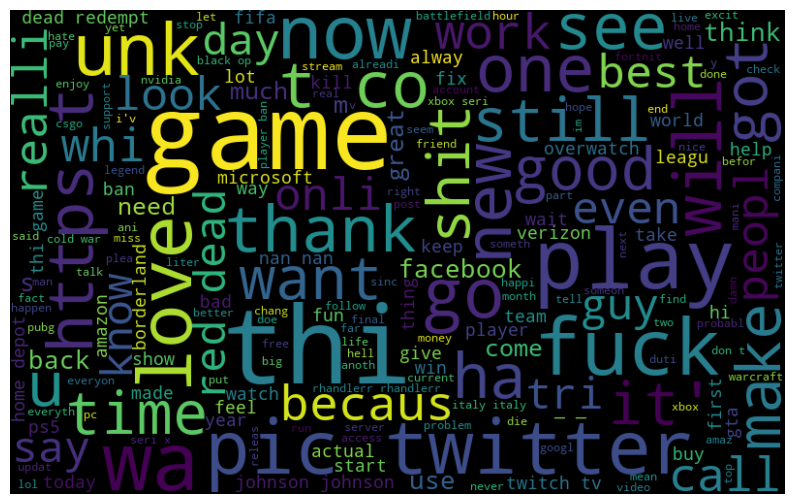

In [30]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Understanding the impact of Hashtags

In [31]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [32]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'])

# unnesting list
HT_regular = sum(HT_regular,[])

### Graph of popular words

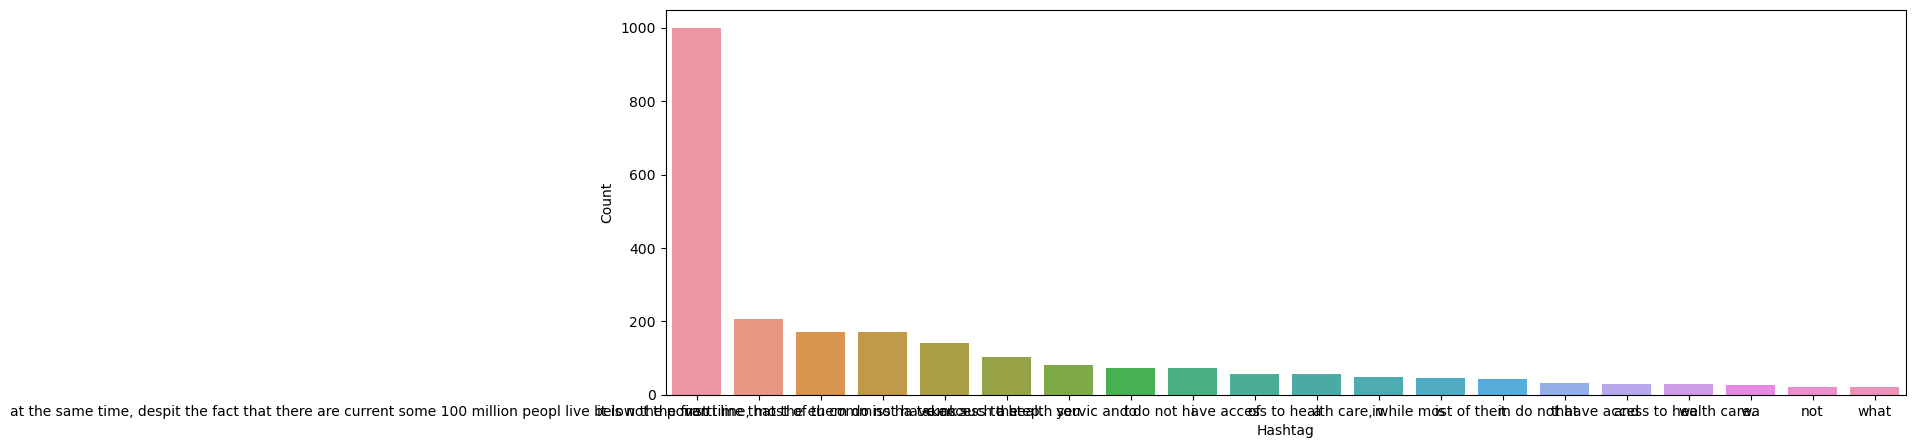

In [33]:
a = nltk.FreqDist(combi['tidy_tweet'])
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

## Bag-of-Words Features

In [35]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(72654, 1000)

## TF-IDF Features

In [36]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(72654, 1000)

In [58]:
pip install --upgrade gensim

     ---------------------------------------- 24.0/24.0 MB 5.5 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.0
    Uninstalling gensim-4.3.0:
      Successfully uninstalled gensim-4.3.0
Note: you may need to restart the kernel to use updated packages.


# Training Naive Bayes Model

In [1]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
# Bag-of-Words Features
train_bow = bow[:71655, :]
test_bow = bow[71655:, :]

In [46]:
# Splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_data.iloc[:, 2],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [47]:
# Naive Bayes model using Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(xtrain_bow, ytrain)

MultinomialNB()

In [54]:
# Predictions on the validation set
prediction = nb.predict_proba(xvalid_bow)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(np.int)

In [58]:
label_encoder = LabelEncoder()
yvalid_numeric = label_encoder.fit_transform(yvalid)

# Rest of your code
f1_score(yvalid_numeric, prediction_int, average='micro')

0.3499558077871331